## Содержание
- **[Задание 1](#Задание-1)**
    - **[Загружаем данные](#Загружаем-данные)**
    - **[Крутим данные](#Крутим-данные)**
    - **[Предобработка данных](#Предобработка-данных)**
    - **[Применение стат. тестов](#Применение-стат.-тестов)**
    - **[Выводы](#Выводы)**
- **[Задание 3](#Задание-3)**


In [44]:
import pandas as pd
import numpy as np
import pingouin as pg

import seaborn as sns
import matplotlib.pyplot as plt

import requests
from urllib.parse import urlencode

import warnings
warnings.filterwarnings('ignore')

sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(12,8)}
        )

## Задание 1
Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

В качестве входных данных Вы имеете 4 csv-файла:

* `groups.csv` - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
* `groups_add.csv` - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
* `active_studs.csv` - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
* `checks.csv` - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

Предлагаем Вам ответить на следующие вопросы:

1. На какие метрики Вы смотрите в ходе анализа и почему?
2. Имеются ли различия в показателях и с чем они могут быть связаны?
3. Являются ли эти различия статистически значимыми?
4. Стоит ли запускать новую механику на всех пользователей?
5. Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

### Загружаем данные

In [45]:
# Функция для считывания данных с Яндекс.Диска
def get_data(df_url, sep=';'):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    
    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=df_url))
    response = requests.get(final_url)
    download_url = response.json()['href']

    # Загружаем файл и сохраняем его
    df = pd.read_csv(download_url, sep=sep)
    
    return df

In [46]:
groups_url = 'https://disk.yandex.ru/d/58Us0DWOzuWAjg'
group_add_url = 'https://disk.yandex.ru/d/3aARY-P9pfaksg'
active_studs_url = 'https://disk.yandex.ru/d/prbgU-rZpiXVYg'
checks_url = 'https://disk.yandex.ru/d/84hTmELphW2sqQ'

In [47]:
# Считаем данные

groups = get_data(groups_url)
active_studs = get_data(active_studs_url)
checks = get_data(checks_url)
groups_add = get_data(group_add_url, sep=',')

### Крутим данные

In [48]:
# Напишем функцию для проверки данных

def df_info(df):
    '''Принимает датафрейм и возвращает количество строк и колонок в нем, типы данных, 
       название колонок с пропущенными значениями и их количество, а также колонки с дубликатами'''
    
    # Размер датафрейма
    nrows = df.shape[0]
    ncolumns = df.shape[1]
    # Типы данных
    d_types = df.dtypes
    # Пропуски
    df_nan = df.isna().sum()
    
    # Определяем колонки с дубликатами
    columns_with_duplicates = []
    cols = df.columns
    for i in range(ncolumns):
        if df.iloc[:, i].nunique() != nrows:
            columns_with_duplicates.append(cols[i])
        continue
    
    print(f'Количество строк: {nrows}', f'Количество столбцов: {ncolumns}', sep='\n', end='\n\n')
    print(f'Типы данных:', d_types, sep='\n', end='\n\n')
    print(f'Пропущенные значения:', df_nan, sep='\n', end='\n\n')            
    print(f'Колонки, в которых есть дубликаты: {columns_with_duplicates}')
    
    return df.sample(5)

In [49]:
df_info(groups)

Количество строк: 74484
Количество столбцов: 2

Типы данных:
id      int64
grp    object
dtype: object

Пропущенные значения:
id     0
grp    0
dtype: int64

Колонки, в которых есть дубликаты: ['grp']


,id,grp
42713,1989549,B
49614,2696513,B
64333,4246332,B
56478,3361138,A
57710,3444349,B


In [50]:
df_info(groups_add)

Количество строк: 92
Количество столбцов: 2

Типы данных:
id      int64
grp    object
dtype: object

Пропущенные значения:
id     0
grp    0
dtype: int64

Колонки, в которых есть дубликаты: ['grp']


,id,grp
40,5723648,B
49,5730382,B
21,5710561,B
39,5723133,A
1,5694830,B


In [51]:
df_info(active_studs)

Количество строк: 8341
Количество столбцов: 1

Типы данных:
student_id    int64
dtype: object

Пропущенные значения:
student_id    0
dtype: int64

Колонки, в которых есть дубликаты: []


,student_id
5120,3285762
1945,3512556
6126,1223576
1560,1799946
7606,3439821


In [52]:
df_info(checks)

Количество строк: 541
Количество столбцов: 2

Типы данных:
student_id      int64
rev           float64
dtype: object

Пропущенные значения:
student_id    0
rev           0
dtype: int64

Колонки, в которых есть дубликаты: ['rev']


,student_id,rev
185,1316069,1900.0
289,2896010,1900.0
10,150911,290.0
197,1445615,1140.0
1,3185,690.0


In [53]:
# Пока что ничего аномального в данных нет

checks.rev.describe()

count     541.000000
mean     1059.752317
std       762.712359
min       199.000000
25%       290.000000
50%       840.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

### Предобработка данных

In [54]:
# Объединим исходные данные по принадлежности пользователей с дополненными
groups_full = pd.concat([groups, groups_add])

# Переименуем колонки 
groups_full.rename(columns={'id': 'student_id'}, inplace=True)

In [55]:
# Дубликатов в студентах нет

groups_full.student_id.duplicated().sum()

0

In [56]:
# Посмотрим, есть ли пользователи с оплатой, но не отмеченные как активные

active_studs['act_flag'] = 1

bug_users = checks.merge(active_studs, how='left', on='student_id').query('act_flag != 1')
bug_users.shape[0]

149

В датасете имеется 149 пользователей с оплатой, но не помеченные как активные. Я предполагаю, что это пользователи, у которых подключена автоматическая оплата, а в период проведения эксперимента они были неактивны

Предполагаем, что если эти пользователи не пользовались сайтом в этот период, значит они не могли видеть и взаимодействовать с новой системой оплаты. 

Что мы с ними делаем? Т.к. мы исследуем влияние непосредственно системы оплаты на наших пользователей, исключим этих пользователей из эксперимента

In [57]:
# Объединим данные и уберем неактивных пользователей с оплатой
bugs_ids = bug_users.student_id.to_list()

data = groups_full.merge(active_studs, how='left', on='student_id') \
                  .merge(checks, how='left', on='student_id') \
                  .query('student_id not in @bugs_ids') \
                  .fillna(0).reset_index()

In [58]:
# Посмотрим на размер групп
data.grp.value_counts()

B    59763
A    14664
Name: grp, dtype: int64

### Определяем ключевые метрики

Исходя из наших данных можно выбрать несколько ключевых метрик:

1. Метрики CR, которые могу нас интересовать:
    * CR_au_total. Конверсия пользователя в активного. Предлагаю посмотреть на данную метрику в качестве оценки системы сплитования. Если CR примерно одинаковый, мы можем косвенно подтвердить нормальную работу системы сплитования
    * CR_au_buy. Конверсия активного пользователя в покупку
2. Метрики среднего чека по следующим группам пользователей:
    * ARPU - средний чек на пользователя
    * ARPAU - средний чек на активного пользователя
    * ARPPU - средний чек на платящего пользователя

Произведем расчет метрик

In [59]:
# Количество пользователей в группах

nstudents = data.groupby('grp', as_index=False) \
                .agg({'student_id': 'count'}) \
                .rename(columns={'student_id': 'students'})

nstudents

,grp,students
0,A,14664
1,B,59763


In [60]:
# Количество платящих пользователей в группах

nactive = data[data.act_flag == 1].groupby('grp', as_index=False) \
                .agg({'student_id': 'count'}) \
                .rename(columns={'student_id': 'active'})

nactive

,grp,active
0,A,1538
1,B,6803


In [61]:
# Количество платящих пользователей в группах

ncustomers = data[data.rev > 0].groupby('grp', as_index=False) \
                .agg({'student_id': 'count'}) \
                .rename(columns={'student_id': 'customers'})

ncustomers

,grp,customers
0,A,78
1,B,314


In [62]:
# Суммарный доход по группам

revenue = data.groupby('grp', as_index=False) \
              .agg({'rev': 'sum'})

revenue

,grp,rev
0,A,72820.0000
1,B,394974.0035


In [63]:
# Объединяем

metrics = nstudents.merge(nactive).merge(ncustomers).merge(revenue)

In [64]:
# Считаем метрики

metrics['CR_au_total'] = metrics.active.div(metrics.students)
metrics['CR_au_buy'] = metrics.customers.div(metrics.active)

metrics['ARPU'] = metrics.rev.div(metrics.students).round(2)
metrics['ARPAU'] = metrics.rev.div(metrics.active).round(2)
metrics['ARPPU'] = metrics.rev.div(metrics.customers).round(2)

In [65]:
metrics

,grp,students,active,customers,rev,CR_au_total,CR_au_buy,ARPU,ARPAU,ARPPU
0,A,14664,1538,78,72820.0000,0.104883,0.050715,4.97,47.35,933.59
1,B,59763,6803,314,394974.0035,0.113833,0.046156,6.61,58.06,1257.88


In [66]:
# Преобразуем наш дф с метриками

metrics_new = metrics.copy().set_index('grp').unstack().to_frame().reset_index() \
                     .rename(columns={'level_0': 'metric', 0: 'value'}) \
                     .pivot(index='metric', columns='grp', values='value')


metrics_new['diff_%'] = (-(1 - metrics_new.iloc[0:5]['B'].div(metrics_new.iloc[0:5]['A']))).mul(100).round(2)

In [67]:
metrics_new

grp,A,B,diff_%
metric,,,
ARPAU,47.350000,58.060000,22.62
ARPPU,933.590000,1257.880000,34.74
ARPU,4.970000,6.610000,33.00
CR_au_buy,0.050715,0.046156,-8.99
CR_au_total,0.104883,0.113833,8.53
active,1538.000000,6803.000000,NaN
customers,78.000000,314.000000,NaN
rev,72820.000000,394974.003500,NaN
students,14664.000000,59763.000000,NaN


Протеворечивая ситуация - после ввода новой системы оплаты мы получили снижение конверсии активных пользователей в покупку, но ARPU, ARPAU и ARPPU выросли

Т.к. мы измереям эффект от взаимодействия пользователя с новый системой олатой, предлагаю смотреть выявлять статистическйю значимость по метрикам ARPPU и CR_au_buy. Так. мы будем измерять эффект непосредственно у тех пользователей, которые видели систему оплаты

### Применение стат. тестов

In [68]:
# Посмотрим на данные

control = data.query('grp == "A" and rev > 0')
test    = data.query('grp == "B" and rev > 0')

<AxesSubplot:xlabel='rev', ylabel='Count'>

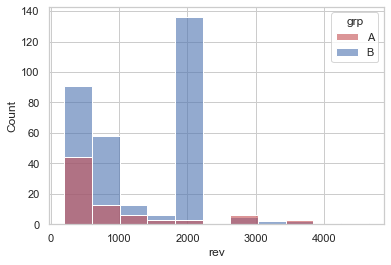

In [69]:
# Распределение явно отличается от нормального. Скошено вправо, что характерно для распределения суммы покупок

sns.histplot(data = data[data.rev > 0], 
              x='rev', 
              hue='grp', 
              palette = ['r', 'b'],
              alpha=0.6)

Также в тестовой группе наблюдается ярко выраженное пиковое значение суммы покупок в ройоне 1900, что существенно отличает анализируемые распределения. 
Тяжело сказать что-то опричинах такого пика, т.к. в подробностях ничего неизвестно о новой механике оплаты, как и о платящей аудитории. 
Возможно, это как раз связано с особенностями новой механики оплаты - были предложены дополнительные бонусы при оплате на определенную сумму.
Также возможен вариант неидеальной работы системы сплитования, когда в тестовую группу попала большая доля пользователей, заинтересованная в приобритении какого-то курса стоимостью 1900

Сложно сказать, никакого контекста относительно проводимого эсксперимента не приведено

<AxesSubplot:xlabel='grp', ylabel='rev'>

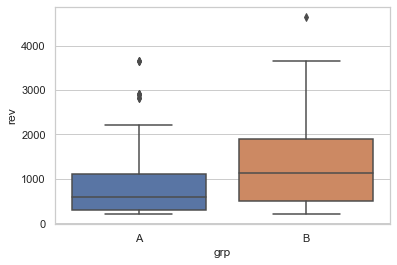

In [70]:
# Боксплот подтверждает наши расчеты о наличии прироста ARPPU в тестовой группе
# Есть выбросы, но их трудно так классфицировать. Скорее это более обеспеченные или усердные студеты

sns.boxplot(data=data[data.rev > 0], x='grp', y='rev')

Т.к. распределения в выборках не являются нормальными + у нас значительные различия по размеру групп, для определения стат.значимости ARPPU воспользуемся бутстрапом

**H0:** ARPPU в контрольной группе равен ARPPU в тестовой

**H1:** ARPPU в контрольной и тестовой группах различается

In [71]:
from bootstrap import get_bootstrap

100%|██████████| 5000/5000 [00:00<00:00, 7290.02it/s]


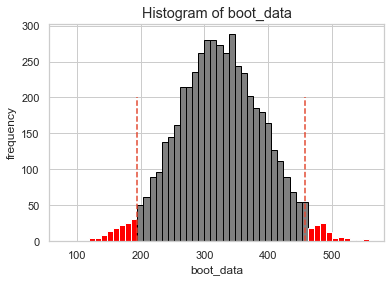

In [72]:
bs_mean = get_bootstrap(test.rev, control.rev, statistic=np.mean, boot_it=5000)

In [73]:
bs_mean['p_value_norm'] # распределение разниц нормально. используем вариант расчета p-value через normal.cdf

1.79494880565634e-06

In [74]:
bs_mean['ci']

,0
0.025,193.677160
0.975,457.736715


p-value < 0.05, ARPPU стат. значимо вырос

Для определения стат. значимости снижения CR_au_buy конверсии активного студента в платящего воспользуемся критерием хи-квадрат, т.к. имеем категориальные данные

**H0:** Взаимосвязь между системой оплаты и конверсией отсутствует

**H1:** Взаимосвязь между системой оплаты и конверсией есть

In [75]:
# Добавим колонку со статусом покупки

data['pay'] = data.rev > 0

In [76]:
expected, observed, stats = pg.chi2_independence(data[data.act_flag == 1], x='grp', y='pay', correction=False)

In [77]:
observed

pay,False,True
grp,,
A,1460,78
B,6489,314


In [78]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.582151,1.0,0.445470,0.008354,0.118893
1,cressie-read,0.666667,0.578488,1.0,0.446905,0.008328,0.118449
2,log-likelihood,0.000000,0.571311,1.0,0.449738,0.008276,0.117579
3,freeman-tukey,-0.500000,0.566056,1.0,0.451830,0.008238,0.116942
4,mod-log-likelihood,-1.000000,0.560907,1.0,0.453895,0.008200,0.116318
5,neyman,-2.000000,0.550921,1.0,0.457942,0.008127,0.115109


p-value > 0.05 => нет основания отклонить нулевую гипотезу.

### Выводы
1. ARPPU в тестовой группе вырос на 34,7 %. Анализ методом бутстрапа показали статистически значимый прирост
2. Конверсия снизилась на 9,0 %. Критерий хи-квадрат не показал, что падение конверсии статистически значимо
3. На этапе проверки данных было выявлено 149 платящих пользователей, не отмеченных как активные. Они были классифицированы как пользователи с подключенными автоплатежами и удалены из эксперимента
4. Т.к. ARPPU вырос, а конверсия снизилась незначительно, рекомендуется внедрять новую механику оплаты

____________

## Задание 3

1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла `groups_add.csv` (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [79]:
def updade_data(groups_add, groups=groups, 
                active_studs=active_studs, checks=checks):
    
    '''Функция для автоматической подгрузки информации и расчета метрик. Приниммает: 
    groups_add - df с дополненными данными о принадлежности пользователей к группам ['student_id', 'group'],
    groups - df с данными о принадлежности пользователей к группам ['student_id', 'group'],
    active_studs - df с данными об активности пользователей ['student_id'],
    checks - df с информацией об оплатах ['student_id', 'rev']'''
    
    # Подготовка данных
    groups_add.rename(columns={groups_add.columns[0]: 'student_id', 
                               groups_add.columns[1]: 'grp'}, inplace=True)
    groups.rename(columns={'id': 'student_id'}, inplace=True)
    
    # Собираем студентов вместе
    groups_full = pd.concat([groups, groups_add])
    
    # Работа со студентами с подключенными автоплатежами
    active_studs['act_flag'] = 1
    bug_users = checks.merge(active_studs, how='left', on='student_id').query('act_flag != 1')
    bugs_ids = bug_users.student_id.to_list()

    
    # Проверка на дубликаты
    if groups_full.student_id.duplicated().sum() != 0:
        print('Имеются дубликаты в группах. Требуется проверка')
        
    # Объединяем данные   
    data = groups_full.merge(active_studs, how='left', on='student_id') \
                    .merge(checks, how='left', on='student_id') \
                    .query('student_id not in @bugs_ids') \
                    .fillna(0).reset_index()
    
    # Количество студентов в группах
    nstudents = data.groupby('grp', as_index=False) \
                    .agg({'student_id': 'count'}) \
                    .rename(columns={'student_id': 'students'})

    # Количество активных студентов в группах
    nactive = data[data.act_flag == 1].groupby('grp', as_index=False) \
                                      .agg({'student_id': 'count'}) \
                                      .rename(columns={'student_id': 'active'})
    
    # Количество платящих студентов в группах
    ncustomers = data[data.rev > 0].groupby('grp', as_index=False) \
                                   .agg({'student_id': 'count'}) \
                                   .rename(columns={'student_id': 'customers'})
    
    # Суммарный доход по группам
    revenue = data.groupby('grp', as_index=False) \
                  .agg({'rev': 'sum'})
    
    # Считаем метрики
    metrics = nstudents.merge(nactive).merge(ncustomers).merge(revenue)
    
    metrics['CR_au_total'] = metrics.active.div(metrics.students)
    metrics['CR_au_buy'] = metrics.customers.div(metrics.active)

    metrics['ARPU'] = metrics.rev.div(metrics.students).round(2)
    metrics['ARPAU'] = metrics.rev.div(metrics.active).round(2)
    metrics['ARPPU'] = metrics.rev.div(metrics.customers).round(2)

    # Преобразуем наш дф с метриками

    metrics = metrics.set_index('grp').unstack().to_frame().reset_index() \
                    .rename(columns={'level_0': 'metric',
                            0: 'value'}) \
                    .pivot(index='metric', columns='grp', values='value')


    metrics['diff_%'] = (-(1 - metrics.iloc[0:5]['B'].div(metrics.iloc[0:5]['A']))).mul(100).round(2)
    
    return metrics

In [80]:
updade_data(groups_add)

grp,A,B,diff_%
metric,,,
ARPAU,47.350000,58.060000,22.62
ARPPU,933.590000,1257.880000,34.74
ARPU,4.970000,6.610000,33.00
CR_au_buy,0.050715,0.046156,-8.99
CR_au_total,0.104883,0.113833,8.53
active,1538.000000,6803.000000,NaN
customers,78.000000,314.000000,NaN
rev,72820.000000,394974.003500,NaN
students,14664.000000,59763.000000,NaN


In [81]:
def vizualization(metrics, data):
    '''Функция для визуализации полученных метрик. Принимает:
    metrics - таблица с метриками ['grp', 'students', 'customers', 'rev', 'cr', 'avg_check', 'ARPU'],
    data - результирующая таблица с данными['student_id', 'act_flag', 'grp', 'rev']'''
    
    control_rev = data.query('grp == "A" & rev > 0').rev
    test_rev    = data.query('grp == "B" & rev > 0').rev
    
    #  Графики распрделения сумм покупок по группам
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    sns.histplot(control_rev, ax=axes[0], color='red')
    sns.histplot(test_rev, ax=axes[1], color='blue')
    sns.boxplot(data=data[data.rev > 0], x='grp', y='rev')
    axes[0].set(title='Revenue group A', xlabel='Expenses')
    axes[1].set(title='Revenue group B', xlabel='Expenses')
    axes[2].set(title='Revenue by groups', ylabel='Revenue', xlabel='Groups')
    
    # Графики метрик по группам
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    
    metrics_list = ['ARPAU', 'CR_au_buy', 'ARPPU']
    titles = ['ARPAU', 'Conversion to purchase', 'ARPPU']
    for title, metric, ax in zip(titles, metrics_list, axes.flatten()): 
        sns.barplot(x='grp', y=metric, data=metrics, ax=ax)
        ax.set(title=title, xlabel='Group', ylabel=None)
    
    plt.show()

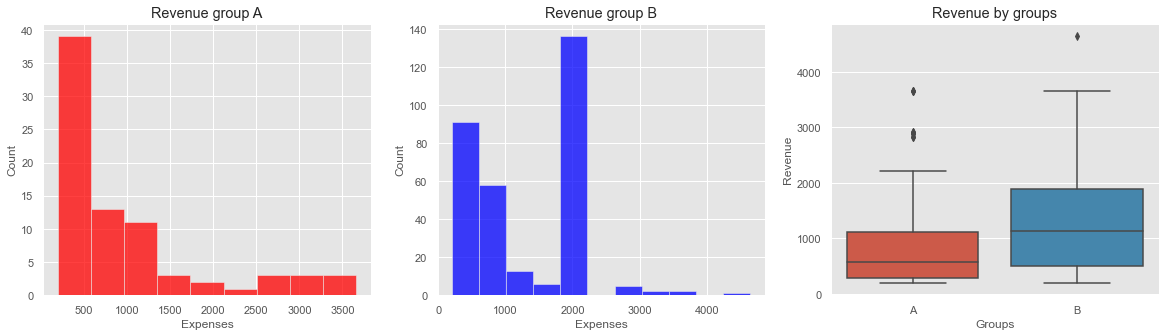

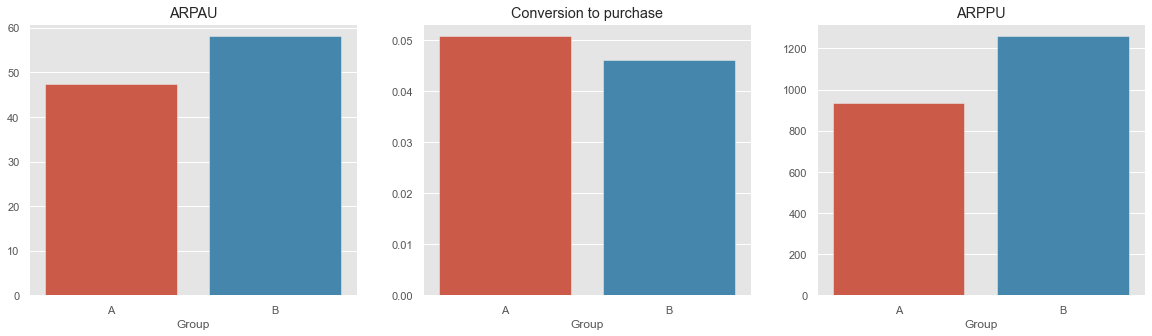

In [82]:
vizualization(metrics, data)